# Mounting Google Drive

# Getting the Dataset

## Downloading Dataset
Media Share Link: https://www.mediafire.com/folder/trbjv7bysiycl/challenges-in-representation-learning-facial-expression-recognition-challenge

Download fer2013.tar.gz, unzip it and upload it on your google drive, and then mount your drive on colab so that the dataset is accessible to Google Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.listdir()

['.config', 'gdrive', 'sample_data']

In [ ]:
os.chdir('./gdrive')

In [ ]:
os.chdir('./My Drive/fer2013')

In [ ]:
os.listdir()

['fer2013.csv', 'README', 'fer2013.bib']

# Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("fer2013.csv")

In [ ]:
emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

In [ ]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
df.Usage.unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [ ]:
X_train,train_y,X_test,test_y=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        else:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

In [ ]:
X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

In [ ]:
X_train.shape

(28709, 2304)

In [ ]:
np.unique(test_y)

array([0., 1., 2., 3., 4., 5., 6.], dtype=float32)

In [ ]:
image1 = X_train[257]

In [ ]:
image1 = np.reshape(image1,(48,48))

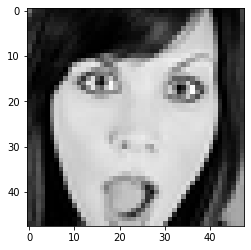

In [ ]:
plt.imshow(image1,cmap='gray') #showing a random image

In [ ]:
emotions[int(train_y[257])]

'surprise'

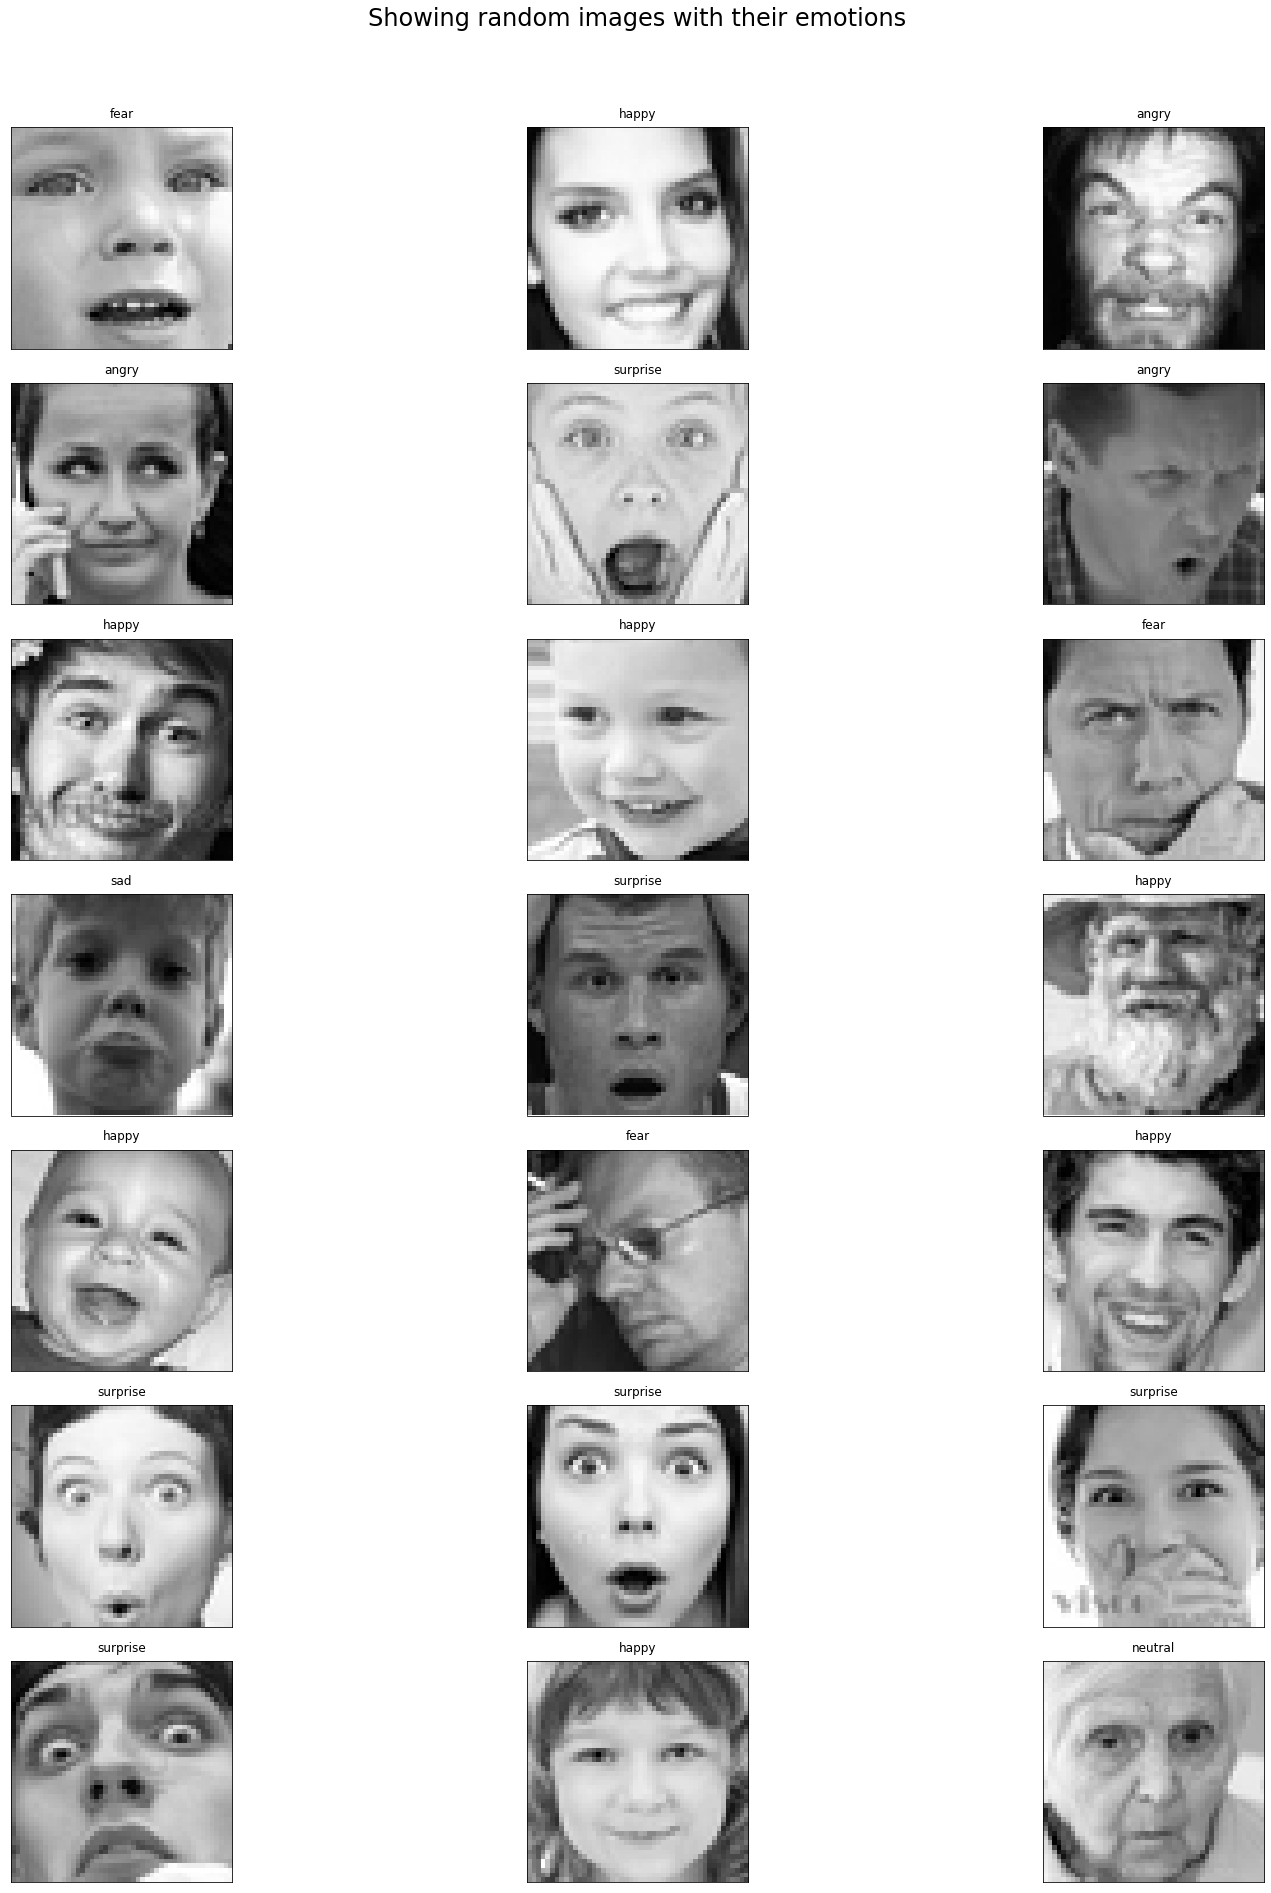

In [ ]:
from random import randint
rows = 7
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing random images with their emotions", y=1.05, fontsize=24)
for i in range(rows):
  for j in range(cols):
    id = randint(0,28708)
    
    img = np.reshape(X_train[id],(48,48))
    ax[i][j].imshow(img, cmap = 'gray')
    ax[i][j].set_title(emotions[int(train_y[id])], pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()